<a href="https://colab.research.google.com/github/Nilavan/Quora-question-pairs/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exploratory Data Analysis

In [2]:
# reading data
df = pd.read_csv('train.csv')
print("Number of rows: ",df.shape[0])
df.head()

Number of rows:  404290


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Percentage 0: 63.0802146973707
Percentage 1 36.9197853026293


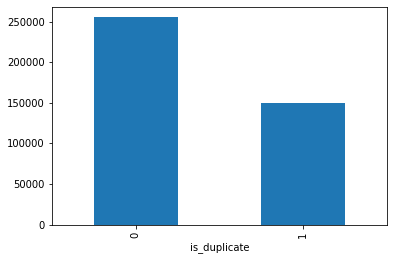

In [26]:
# distribution of data among output class
# 0 - Not similar
# 1 - Similar

df.groupby('is_duplicate')['id'].count().plot.bar()
plt.plot()
print("Percentage 0: {}\nPercentage 1 {}".format(100 - df.is_duplicate.mean()*100,df.is_duplicate.mean()*100))

In [64]:
# Number of unique questions

qids = pd.Series(list(df.qid1)+list(df.qid2))
unique_qs = len(np.unique(qids))
qs_more_than_once = np.sum(qids.value_counts()>1)
highest_freq_q = np.max(qids.value_counts())

print('Total number of unique questions: ',unique_qs)
print('Number of questions that appear more than once: ',qs_more_than_once)
print('Max number of times a question repeated: ',highest_freq_q)

Total number of unique questions:  537933
Number of questions that appear more than once:  111780
Max number of times a question repeated:  157


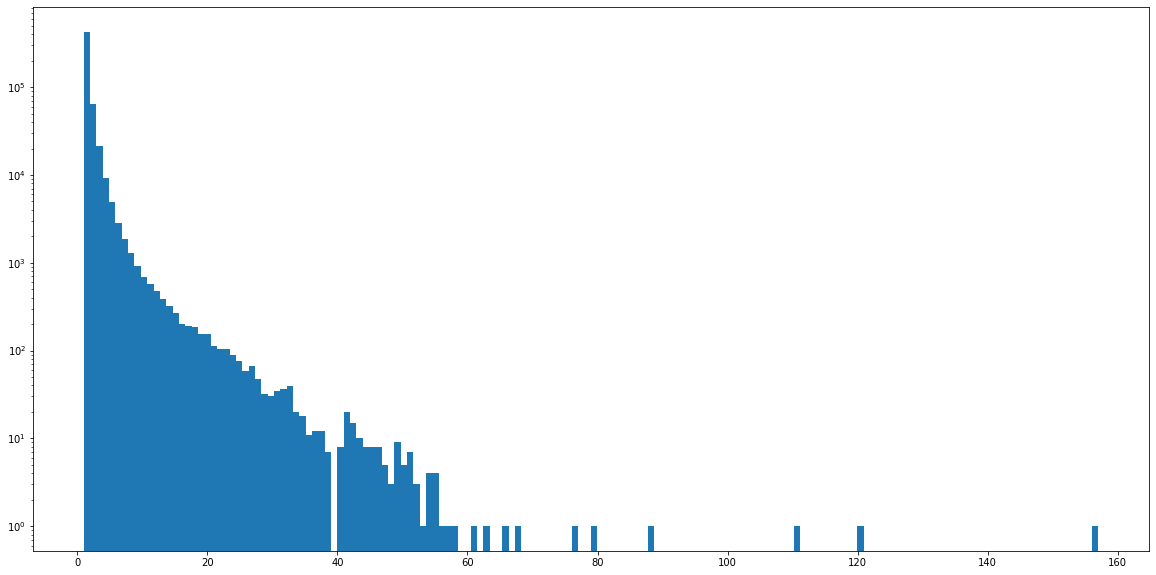

In [81]:
# Frequency of each question

plt.figure(figsize=(20,10))
plt.yscale('log', nonposy='clip')
plt.hist(qids.value_counts(),bins=160)
plt.show()

In [79]:
# checking for nans

df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [90]:
# Fill nans

df.fillna('',inplace=True)

In [91]:
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
